In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [4]:
df_stocks = pd.read_pickle(r"C:\Users\vedak\OneDrive\Desktop\New folder\STOCK MARKET\Stock_Market_Prediction-master\Data\Pickled ten year filtered data (Articles + DJIA).pkl")

In [5]:
df_stocks

close     adj close  \
2007-01-01  12469.971875  12469.971875   
2007-01-02  12472.245703  12472.245703   
2007-01-03  12474.519531  12474.519531   
2007-01-04  12480.690430  12480.690430   
2007-01-05  12398.009766  12398.009766   
...                  ...           ...   
2016-12-27  19945.039062  19945.039062   
2016-12-28  19833.679688  19833.679688   
2016-12-29  19819.779297  19819.779297   
2016-12-30  19762.599609  19762.599609   
2016-12-31  19762.599609  19762.599609   

                                                     articles  
2007-01-01  . What Sticks from '06. Somalia Orders Islamis...  
2007-01-02  . Heart Health: Vitamin Does Not Prevent Death...  
2007-01-03  . Google Answer to Filling Jobs Is an Algorith...  
2007-01-04  . Helping Make the Shift From Combat to Commer...  
2007-01-05  . Rise in Ethanol Raises Concerns About Corn a...  
...                                                       ...  
2016-12-27  . Should the U.S. Embassy Be Moved From Tel Av...  
2016-12-28  . When Finding the Right Lawyer Seems Daunting...  
2016-12-29  . Does Empathy Guide or Hinder Moral Action?. ...  
2016-12-30  . Shielding Seized Assets From Corruption’s Cl...  
2016-12-31  Terrorist Attack at Nightclub in Istanbul Kill...  

[3653 rows x 3 columns]

In [6]:
df_stocks['prices'] = df_stocks['adj close'].apply(np.int64)

In [7]:
# selecting the prices and articles
df_stocks = df_stocks[['prices', 'articles']]

In [8]:
df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))

C:\Users\vedak\AppData\Local\Temp\ipykernel_9524\3705301906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks['articles'] = df_stocks['articles'].map(lambda x: x.lstrip('.-'))


In [9]:
df_stocks

prices                                           articles
2007-01-01   12469   What Sticks from '06. Somalia Orders Islamist...
2007-01-02   12472   Heart Health: Vitamin Does Not Prevent Death ...
2007-01-03   12474   Google Answer to Filling Jobs Is an Algorithm...
2007-01-04   12480   Helping Make the Shift From Combat to Commerc...
2007-01-05   12398   Rise in Ethanol Raises Concerns About Corn as...
...            ...                                                ...
2016-12-27   19945   Should the U.S. Embassy Be Moved From Tel Avi...
2016-12-28   19833   When Finding the Right Lawyer Seems Daunting,...
2016-12-29   19819   Does Empathy Guide or Hinder Moral Action?. C...
2016-12-30   19762   Shielding Seized Assets From Corruption’s Clu...
2016-12-31   19762  Terrorist Attack at Nightclub in Istanbul Kill...

[3653 rows x 2 columns]

In [10]:
df = df_stocks[['prices']].copy()
df

prices
2007-01-01   12469
2007-01-02   12472
2007-01-03   12474
2007-01-04   12480
2007-01-05   12398
...            ...
2016-12-27   19945
2016-12-28   19833
2016-12-29   19819
2016-12-30   19762
2016-12-31   19762

[3653 rows x 1 columns]

In [11]:
# Adding new columns to the data frame
df["compound"] = ''
df["neg"] = ''
df["neu"] = ''
df["pos"] = ''

In [12]:
df

prices compound neg neu pos
2007-01-01   12469                     
2007-01-02   12472                     
2007-01-03   12474                     
2007-01-04   12480                     
2007-01-05   12398                     
...            ...      ...  ..  ..  ..
2016-12-27   19945                     
2016-12-28   19833                     
2016-12-29   19819                     
2016-12-30   19762                     
2016-12-31   19762                     

[3653 rows x 5 columns]

In [15]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vedak\AppData\Roaming\nltk_data...


True

In [18]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

sid = SentimentIntensityAnalyzer()
for idx, row in df_stocks.iterrows():
    try:
        sentence = unicodedata.normalize('NFKD', row['articles']).encode('ascii', 'ignore').decode('utf-8')
        ss = sid.polarity_scores(sentence)
        df.at[idx, 'compound'] = ss['compound']
        df.at[idx, 'neg'] = ss['neg']
        df.at[idx, 'neu'] = ss['neu']
        df.at[idx, 'pos'] = ss['pos']
    except TypeError:
        print(row['articles'])
        print(idx)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vedak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
df

prices compound    neg    neu    pos
2007-01-01   12469  -0.9814  0.159  0.749  0.093
2007-01-02   12472  -0.8871  0.118  0.783  0.099
2007-01-03   12474  -0.9993  0.198  0.734  0.067
2007-01-04   12480  -0.9982  0.131  0.806  0.062
2007-01-05   12398  -0.9901  0.124  0.794  0.082
...            ...      ...    ...    ...    ...
2016-12-27   19945  -0.9869  0.172   0.72  0.108
2016-12-28   19833  -0.9844  0.177  0.704  0.119
2016-12-29   19819  -0.9725  0.139  0.756  0.105
2016-12-30   19762  -0.9924  0.162  0.731  0.108
2016-12-31   19762  -0.8948  0.181  0.658   0.16

[3653 rows x 5 columns]

In [21]:
train_start_date = '2007-01-01'
train_end_date = '2014-12-31'
test_start_date = '2015-01-01'
test_end_date = '2016-12-31'
train = df.loc[train_start_date : train_end_date]
test = df.loc[test_start_date:test_end_date]

In [23]:
sentiment_score_list = []
for idx, row in train.iterrows():
    # sentiment_score = np.asarray([row['compound'], row['neg'], row['neu'], row['pos']])
    sentiment_score = np.asarray([row['neg'], row['pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [25]:
sentiment_score_list = []
for idx, row in test.iterrows():
    # sentiment_score = np.asarray([row['compound'], row['neg'], row['neu'], row['pos']])
    sentiment_score = np.asarray([row['neg'], row['pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [26]:
y_train = pd.DataFrame(train['prices'])
y_test = pd.DataFrame(test['prices'])

In [29]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

C:\Users\vedak\AppData\Local\Temp\ipykernel_9524\986075938.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(numpy_df_train, y_train)


RandomForestRegressor()

In [28]:
pip install treeinterpreter

Note: you may need to restart the kernel to use updated packages.


In [31]:
print(rf.feature_importances_)

[0.54054959 0.45945041]


In [32]:
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [33]:
prediction

array([[10856.66      ],
       [10470.63642857],
       [13536.99833333],
       [13086.855     ],
       [11819.77666667],
       [14054.8485    ],
       [11109.13071429],
       [10427.51      ],
       [14035.39666667],
       [10715.47      ],
       [13063.9965    ],
       [10659.86716667],
       [14786.5345    ],
       [14094.41841667],
       [11366.255     ],
       [13288.82833333],
       [13282.245     ],
       [11640.71661905],
       [14232.42      ],
       [15265.69333333],
       [10847.0052381 ],
       [11057.71      ],
       [10864.91240476],
       [12404.54      ],
       [14145.88      ],
       [11888.91      ],
       [13466.85      ],
       [13099.244     ],
       [12041.23309524],
       [11186.35      ],
       [13190.48666667],
       [12770.76      ],
       [ 9567.43      ],
       [10592.97333333],
       [13761.76383333],
       [14298.85      ],
       [13304.63366667],
       [12803.73      ],
       [12678.28      ],
       [13471.7975    ],


In [34]:
contributions

array([[ -954.30080783,  -775.6257151 ],
       [-1782.18576485,  -333.7643295 ],
       [   -5.72728087,   956.13909127],
       ...,
       [-1025.40879316,  -892.76722977],
       [ -794.29767909,  -783.47051051],
       [ -123.06462262,  -297.90190031]])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
dx = pd.date_range(test_start_date, test_end_date)
predictions_df = pd.DataFrame(data=prediction, index=test.index, columns=['prices'])

In [38]:
predictions_df

prices
2015-01-01  10856.660000
2015-01-02  10470.636429
2015-01-03  13536.998333
2015-01-04  13086.855000
2015-01-05  11819.776667
...                  ...
2016-12-27  11792.721000
2016-12-28  10841.393333
2016-12-29  10668.410500
2016-12-30  11008.818333
2016-12-31  12165.620000

[731 rows x 1 columns]

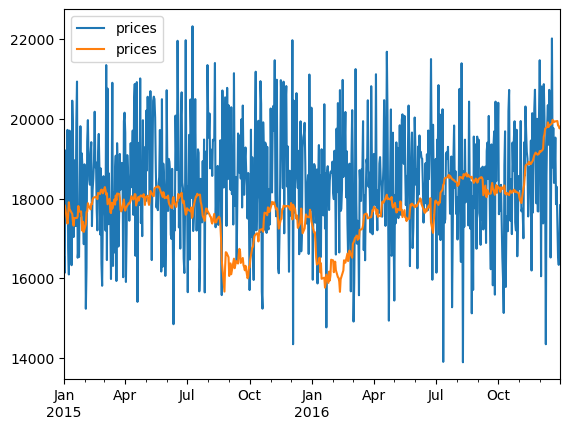

In [49]:
import os

os.makedirs("graphs", exist_ok=True)  # Ensure the folder exists

predictions_plot = predictions_df.plot()
fig = y_test.plot(ax=predictions_plot).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

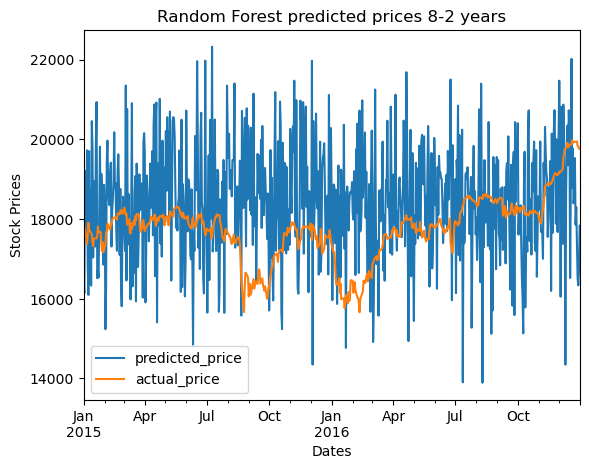

In [48]:
import os

os.makedirs("graphs", exist_ok=True)  # Create the folder if it doesn't exist

ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest without smoothing.png")

In [41]:
test

prices compound    neg    neu    pos
2015-01-01   17828  -0.6786  0.135   0.73  0.135
2015-01-02   17832  -0.9667  0.145   0.76  0.095
2015-01-03   17722  -0.9677  0.127  0.785  0.088
2015-01-04   17612  -0.9971   0.22  0.716  0.064
2015-01-05   17501  -0.9905  0.156  0.767  0.077
...            ...      ...    ...    ...    ...
2016-12-27   19945  -0.9869  0.172   0.72  0.108
2016-12-28   19833  -0.9844  0.177  0.704  0.119
2016-12-29   19819  -0.9725  0.139  0.756  0.105
2016-12-30   19762  -0.9924  0.162  0.731  0.108
2016-12-31   19762  -0.8948  0.181  0.658   0.16

[731 rows x 5 columns]

Increasing the prices by a constant value so that it represents closing price during the testing

In [43]:
from datetime import datetime, timedelta

temp_date = test_start_date
average_last_5_days_test = 0
total_days = 10
for i in range(total_days):
    average_last_5_days_test += test.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day to date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    # print(temp_date)
average_last_5_days_test = average_last_5_days_test / total_days
print(average_last_5_days_test)

temp_date = test_start_date
average_upcoming_5_days_predicted = 0
for i in range(total_days):
    average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
    # Converting string to date time
    temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
    # Adding one day to date time
    difference = temp_date + timedelta(days=1)
    # Converting again date time to string
    temp_date = difference.strftime('%Y-%m-%d')
    print(temp_date)
average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
print(average_upcoming_5_days_predicted)
# average train.loc['2013-12-31', 'prices'] - predictions_df.loc['2014-01-01', 'prices']
difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
print(difference_test_predicted_prices)

17679.9
2015-01-02
2015-01-03
2015-01-04
2015-01-05
2015-01-06
2015-01-07
2015-01-08
2015-01-09
2015-01-10
2015-01-11
12011.328230952382
5668.5717690476195


In [44]:
predictions_df

prices
2015-01-01  10856.660000
2015-01-02  10470.636429
2015-01-03  13536.998333
2015-01-04  13086.855000
2015-01-05  11819.776667
...                  ...
2016-12-27  11792.721000
2016-12-28  10841.393333
2016-12-29  10668.410500
2016-12-30  11008.818333
2016-12-31  12165.620000

[731 rows x 1 columns]

In [45]:
# Adding 6177 to all the advpredictions_df price values
predictions_df['prices'] = predictions_df['prices'] + difference_test_predicted_prices
predictions_df

prices
2015-01-01  16525.231769
2015-01-02  16139.208198
2015-01-03  19205.570102
2015-01-04  18755.426769
2015-01-05  17488.348436
...                  ...
2016-12-27  17461.292769
2016-12-28  16509.965102
2016-12-29  16336.982269
2016-12-30  16677.390102
2016-12-31  17834.191769

[731 rows x 1 columns]

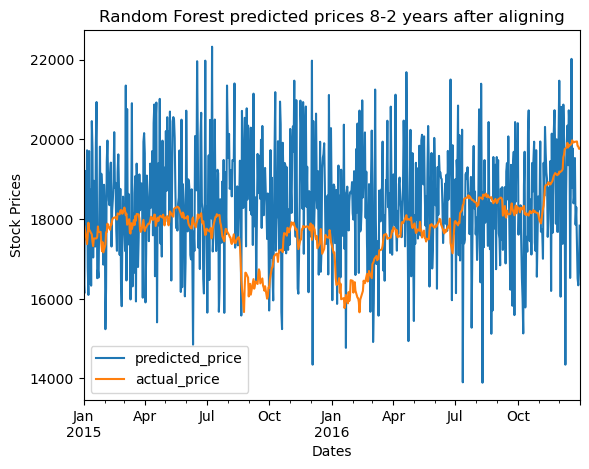

In [47]:
import os

os.makedirs("graphs", exist_ok=True)  # Create the folder if it doesn't exist

ax = predictions_df.rename(columns={"prices": "predicted_price"}).plot(title='Random Forest predicted prices 8-2 years after aligning')
ax.set_xlabel("Dates")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"prices": "actual_price"}).plot(ax = ax).get_figure()
fig.savefig("graphs/random forest with aligning.png")

Smoothing the time series data

Applying EWMA pandas to smooth the stock prices

In [50]:
predictions_df

prices
2015-01-01  16525.231769
2015-01-02  16139.208198
2015-01-03  19205.570102
2015-01-04  18755.426769
2015-01-05  17488.348436
...                  ...
2016-12-27  17461.292769
2016-12-28  16509.965102
2016-12-29  16336.982269
2016-12-30  16677.390102
2016-12-31  17834.191769

[731 rows x 1 columns]

In [52]:
predictions_df['ewma'] = predictions_df["prices"].ewm(span=60, adjust=False).mean()

In [53]:
predictions_df


prices          ewma
2015-01-01  16525.231769  16525.231769
2015-01-02  16139.208198  16512.575259
2015-01-03  19205.570102  16600.870171
2015-01-04  18755.426769  16671.511371
2015-01-05  17488.348436  16698.292914
...                  ...           ...
2016-12-27  17461.292769  18802.570791
2016-12-28  16509.965102  18727.403392
2016-12-29  16336.982269  18649.028929
2016-12-30  16677.390102  18584.385033
2016-12-31  17834.191769  18559.788532

[731 rows x 2 columns]

In [55]:
predictions_df['actual_value_ewma'] = predictions_df["actual_value"].ewm(span=60, adjust=False).mean()

In [56]:
predictions_df

prices          ewma  actual_value  actual_value_ewma
2015-01-01  16525.231769  16525.231769         17828       17828.000000
2015-01-02  16139.208198  16512.575259         17832       17828.131148
2015-01-03  19205.570102  16600.870171         17722       17824.651438
2015-01-04  18755.426769  16671.511371         17612       17817.679259
2015-01-05  17488.348436  16698.292914         17501       17807.296333
...                  ...           ...           ...                ...
2016-12-27  17461.292769  18802.570791         19945       19292.839972
2016-12-28  16509.965102  18727.403392         19833       19310.550137
2016-12-29  16336.982269  18649.028929         19819       19327.220624
2016-12-30  16677.390102  18584.385033         19762       19341.475686
2016-12-31  17834.191769  18559.788532         19762       19355.263368

[731 rows x 4 columns]

In [57]:
# Changing column names
predictions_df.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']

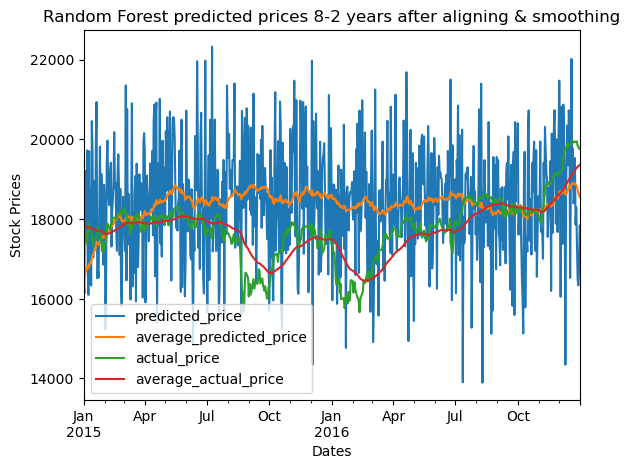

In [58]:
# Now plotting test predictions after smoothing
predictions_plot = predictions_df.plot(title='Random Forest predicted prices 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing.png")


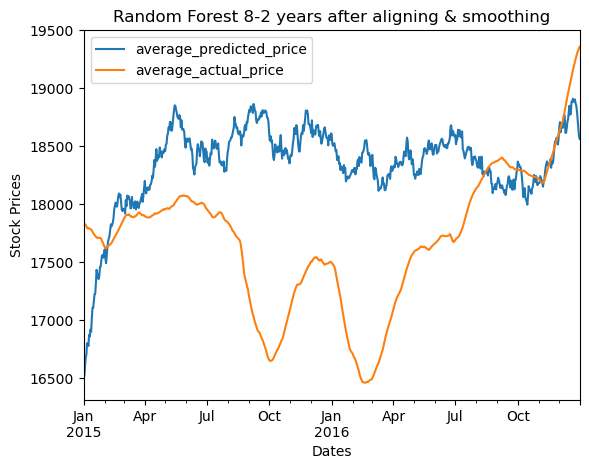

In [59]:
# Plotting just predict and actual average curves
predictions_df_average = predictions_df[['average_predicted_price', 'average_actual_price']]
predictions_plot = predictions_df_average.plot(title='Random Forest 8-2 years after aligning & smoothing')
predictions_plot.set_xlabel("Dates")
predictions_plot.set_ylabel("Stock Prices")
fig = predictions_plot.get_figure()
fig.savefig("graphs/random forest after smoothing 2.png")

Increasing the prices by a constant values so that it represents closing price during testing

In [60]:
def offset_value(test_start_date, test, predictions_df):
    temp_date = test_start_date
    average_last_5_days_test = 0
    average_upcoming_5_days_predicted = 0
    total_days = 10
    for i in range(total_days):
        average_last_5_days_test += test.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_last_5_days_test = average_last_5_days_test / total_days

    temp_date = test_start_date
    for i in range(total_days):
        average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
        temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
        difference = temp_date + timedelta(days=1)
        temp_date = difference.strftime('%Y-%m-%d')
    average_upcoming_5_days_predicted = average_upcoming_5_days_predicted / total_days
    difference_test_predicted_prices = average_last_5_days_test - average_upcoming_5_days_predicted
    return difference_test_predicted_prices

Logistic Regression

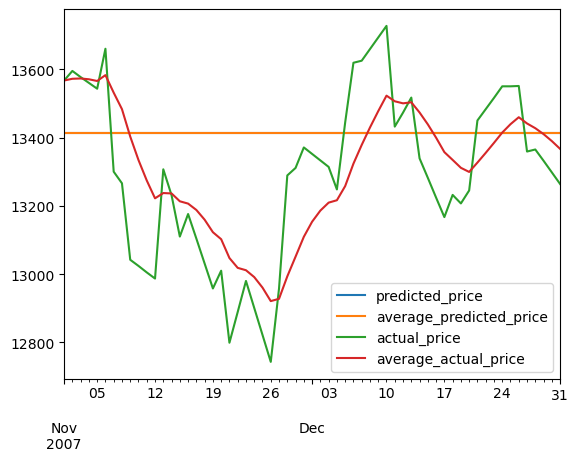

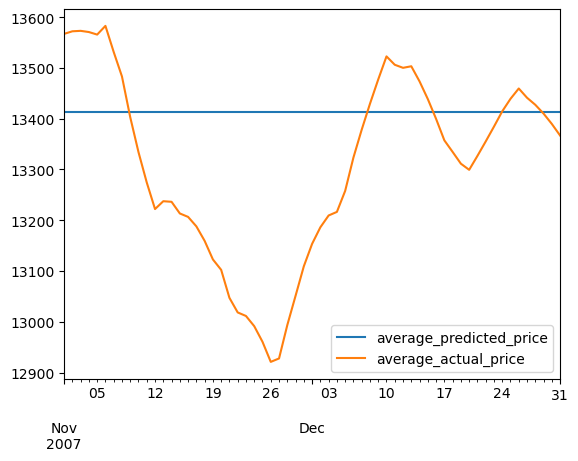

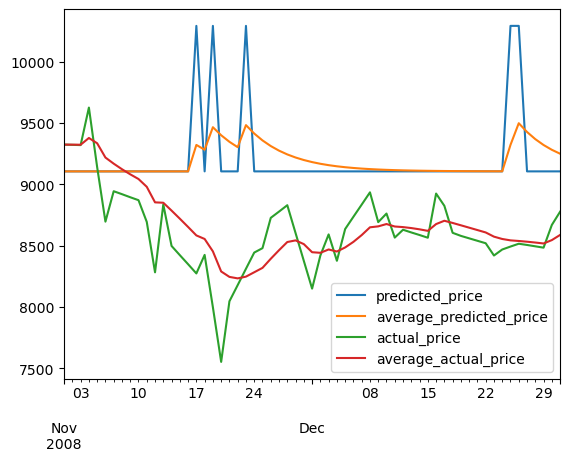

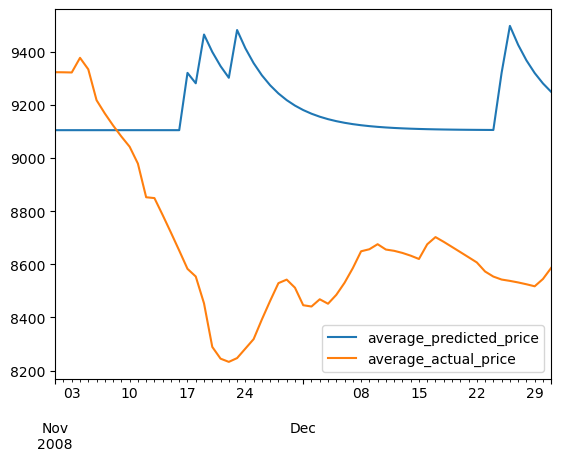

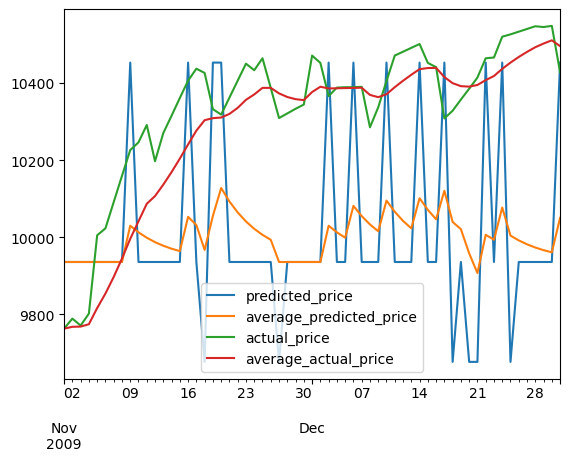

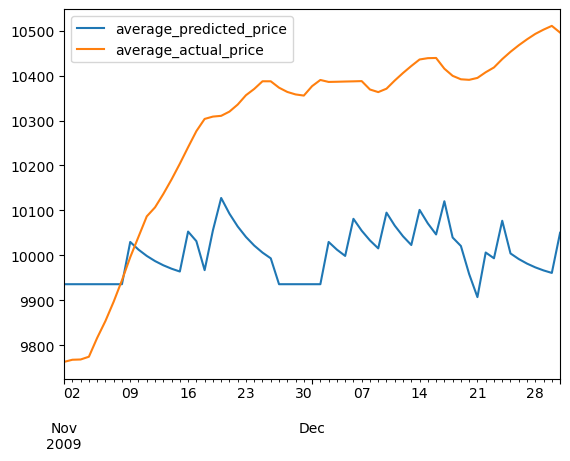

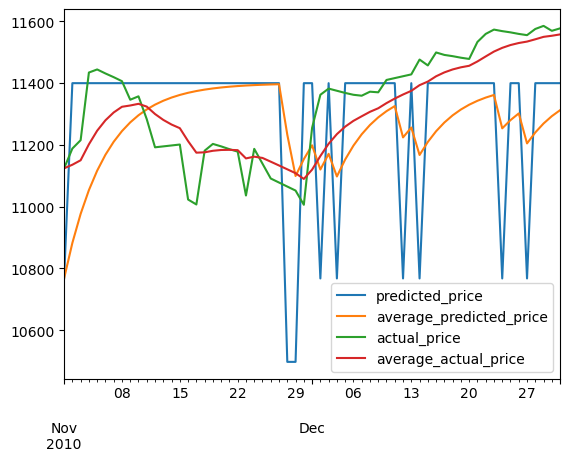

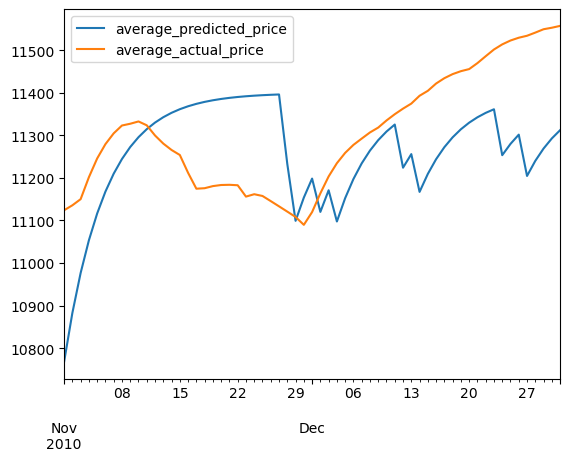

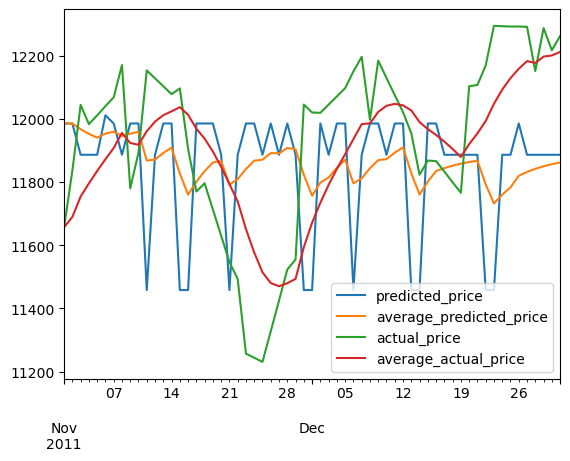

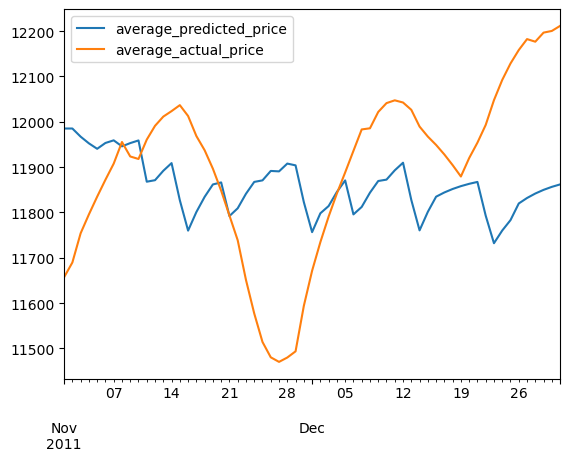

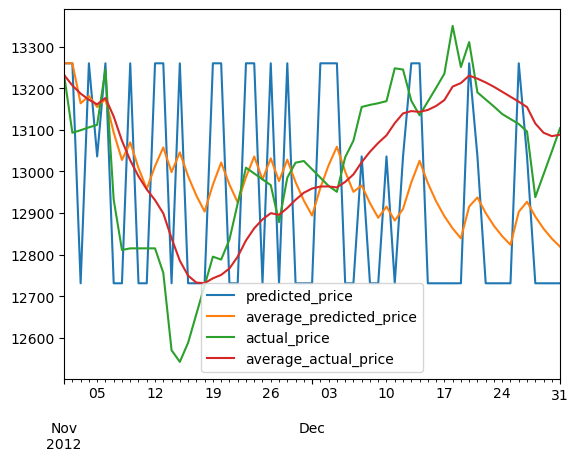

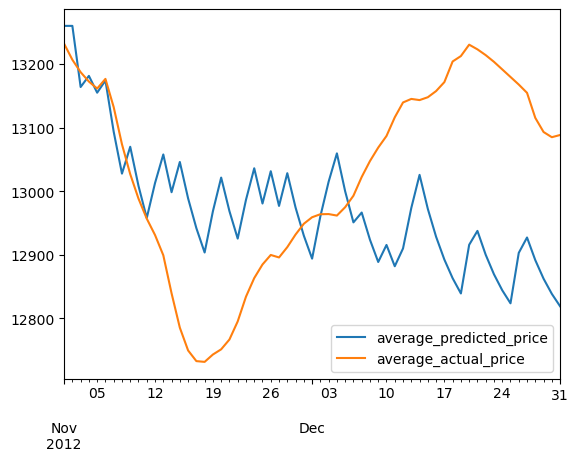

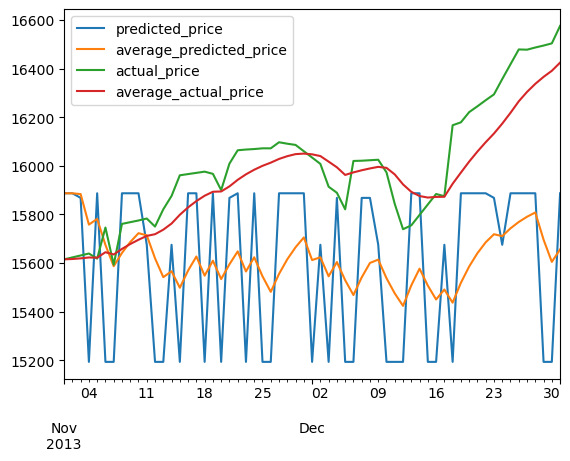

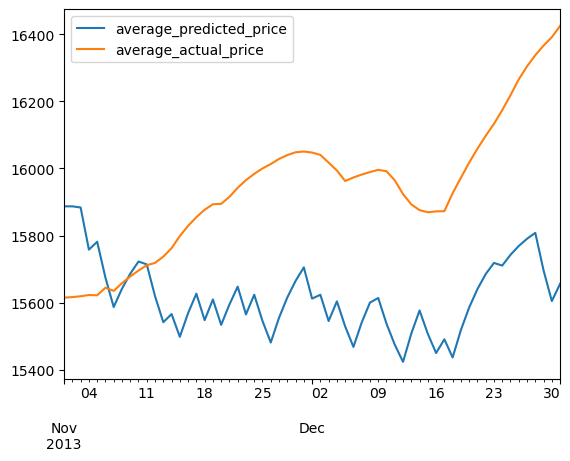

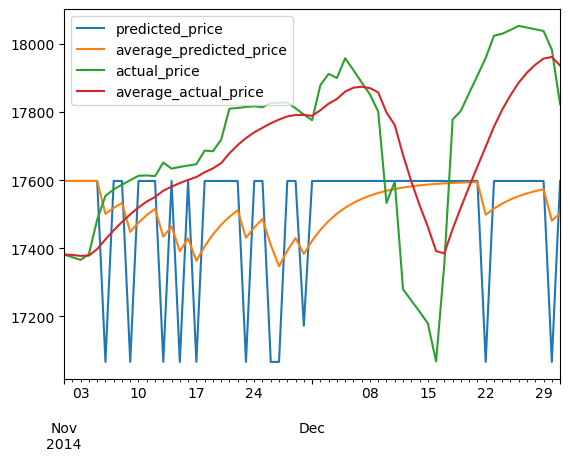

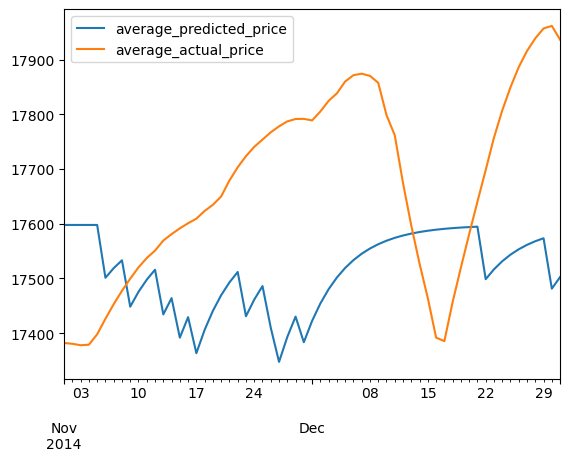

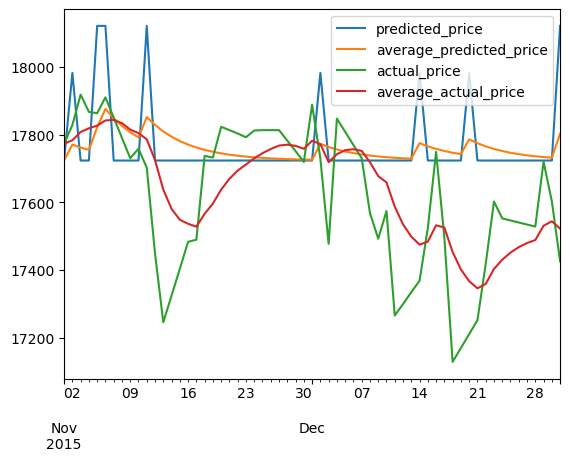

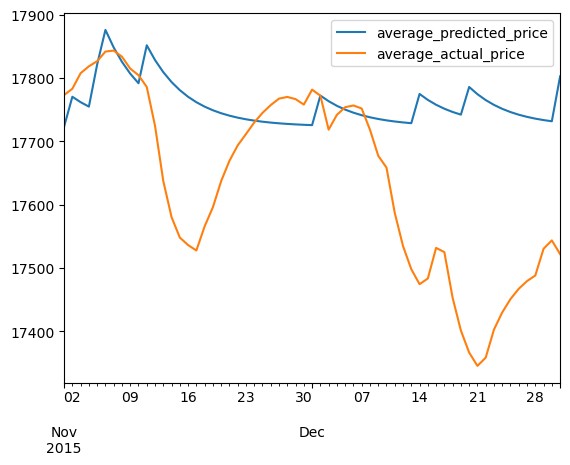

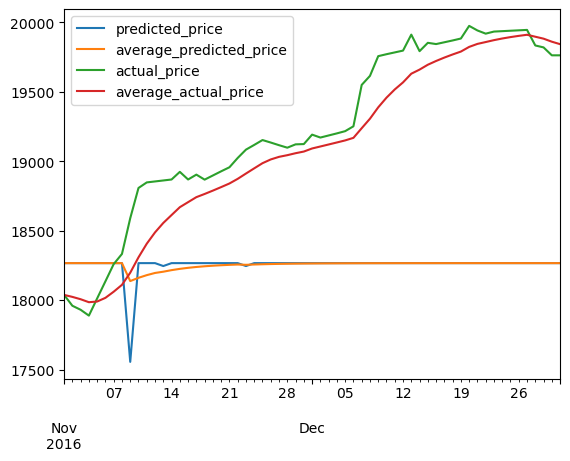

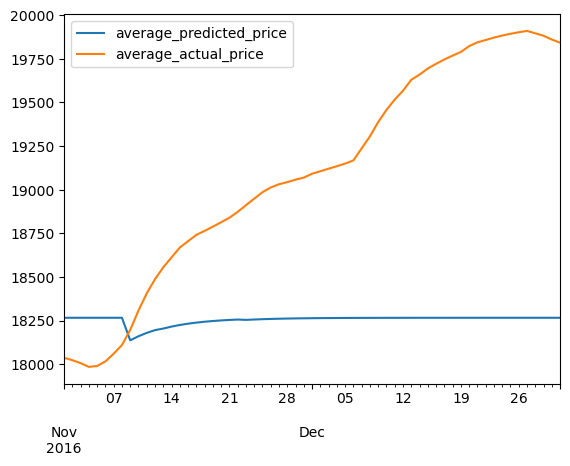

In [63]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.items():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], df.loc[date, 'neu'], df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.items():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], df.loc[date, 'neu'], df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    lr = LogisticRegression()
    lr.fit(numpy_df_train, train['prices'])
    
    prediction = lr.predict(numpy_df_test)
    prediction_list.append(prediction)
    idx = pd.date_range(test_start_date, test_end_date)
    predictions_df_list = pd.DataFrame(data=prediction[0:], index=idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10, adjust=False).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10, adjust=False).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

In [64]:
lr.classes_

array([15660, 15766, 15882, 15885, 15914, 15944, 15954, 15973, 15988,
       15995, 16002, 16009, 16014, 16016, 16024, 16027, 16029, 16069,
       16085, 16086, 16093, 16140, 16145, 16151, 16153, 16167, 16196,
       16204, 16336, 16346, 16363, 16379, 16381, 16391, 16398, 16413,
       16416, 16431, 16449, 16453, 16454, 16460, 16466, 16468, 16484,
       16514, 16516, 16544, 16557, 16598, 16620, 16639, 16697, 16865,
       16899, 16906, 16943, 16964, 16995, 17000, 17006, 17029, 17051,
       17073, 17140, 17148, 17158, 17213, 17217, 17218, 17223, 17227,
       17229, 17251, 17286, 17313, 17325, 17356, 17400, 17409, 17435,
       17481, 17492, 17495, 17498, 17500, 17502, 17515, 17520, 17525,
       17526, 17529, 17530, 17535, 17541, 17556, 17563, 17570, 17576,
       17582, 17593, 17602, 17603, 17609, 17616, 17623, 17633, 17640,
       17651, 17652, 17660, 17674, 17675, 17685, 17694, 17705, 17706,
       17710, 17711, 17716, 17717, 17718, 17720, 17721, 17729, 17732,
       17733, 17737,

In [65]:
lr.coef_[0]

array([-0.11363251,  0.02466557, -0.00451248, -0.02026741])

RandomForest Regressor

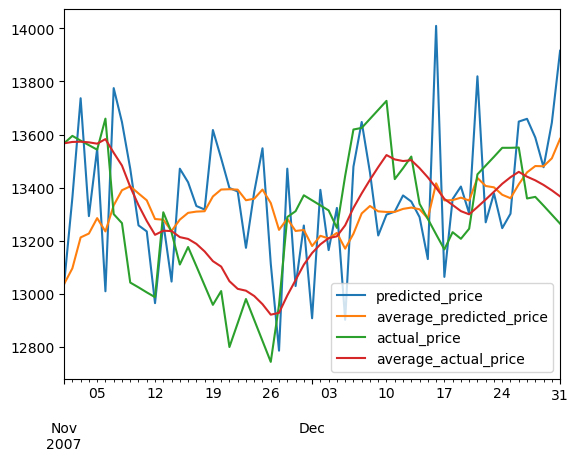

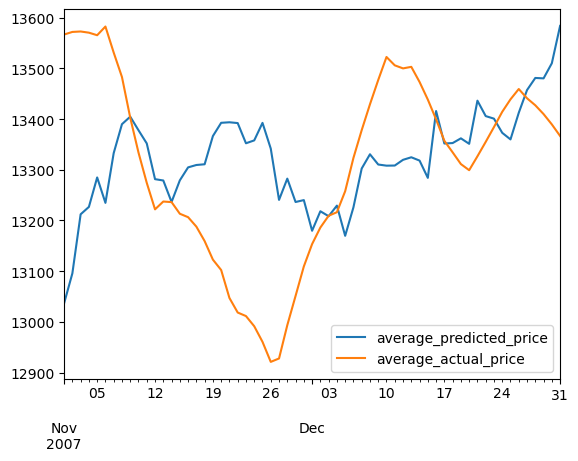

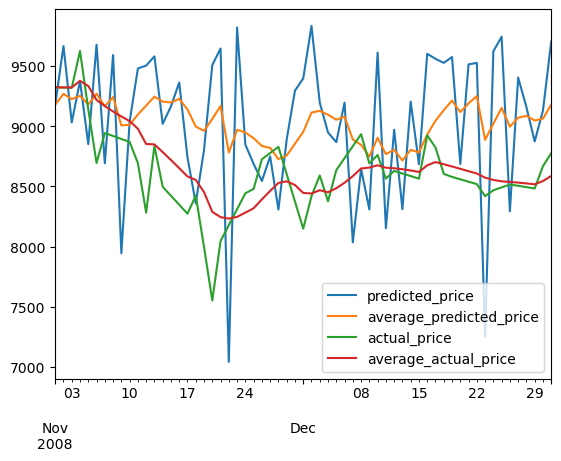

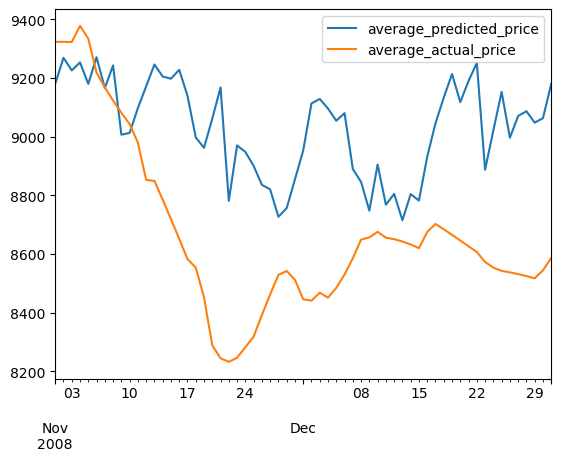

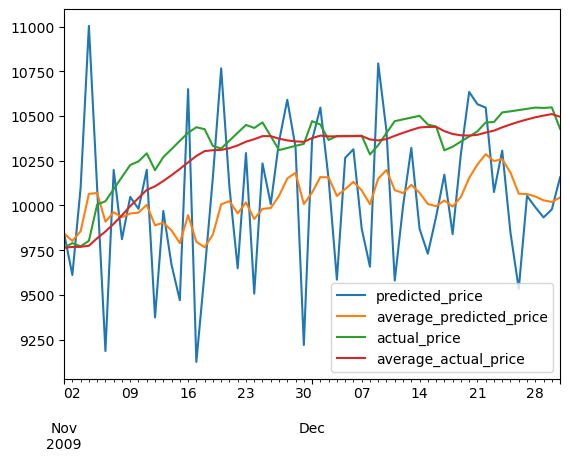

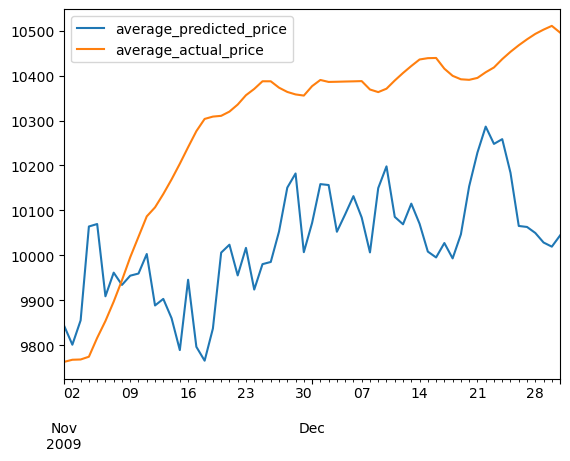

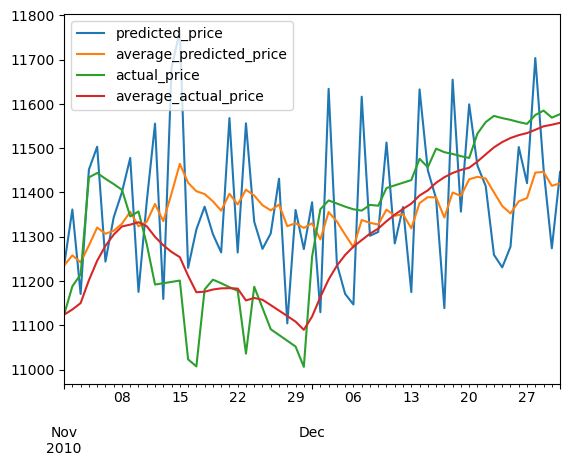

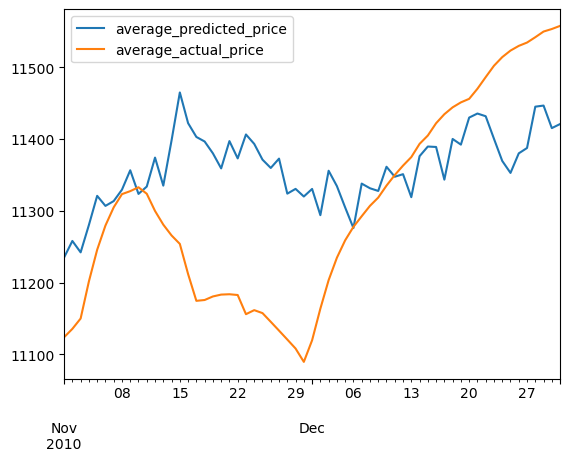

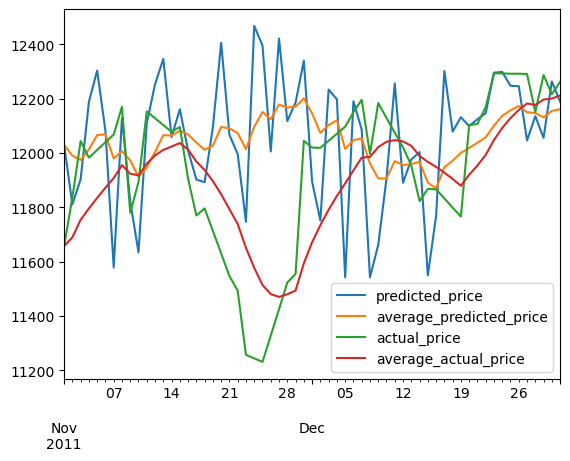

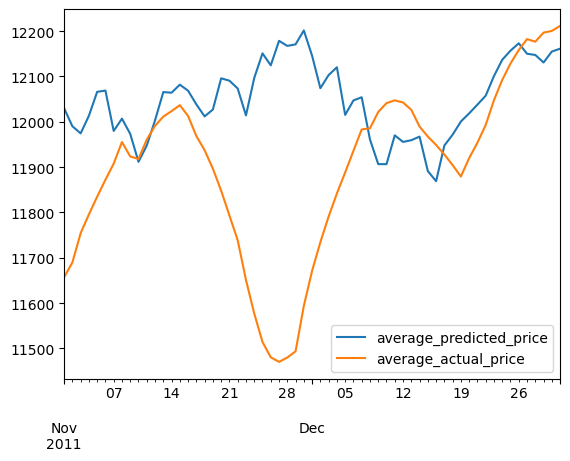

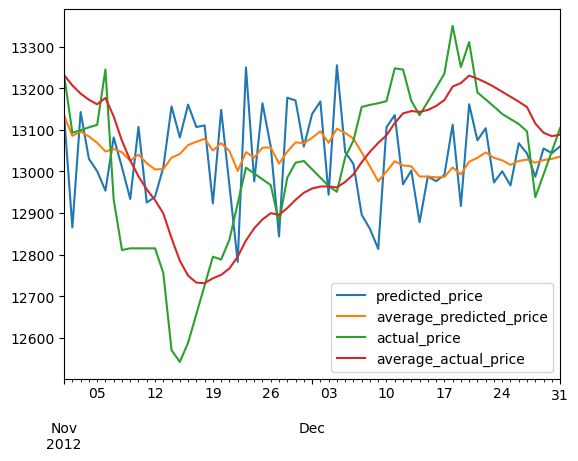

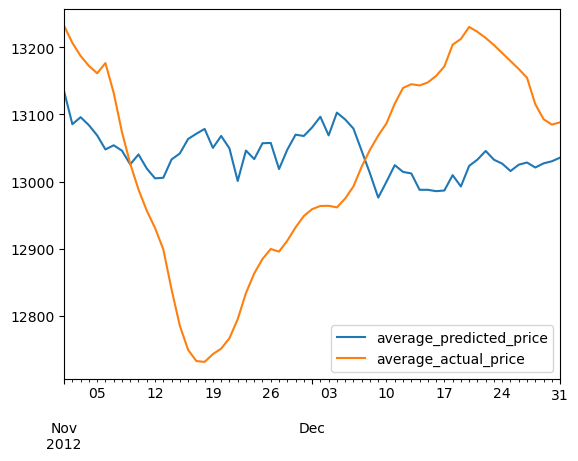

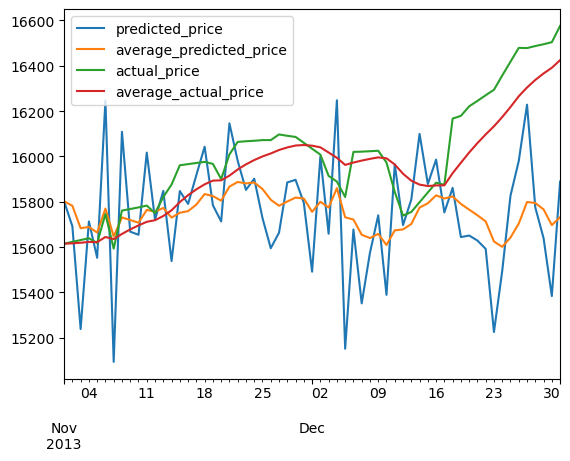

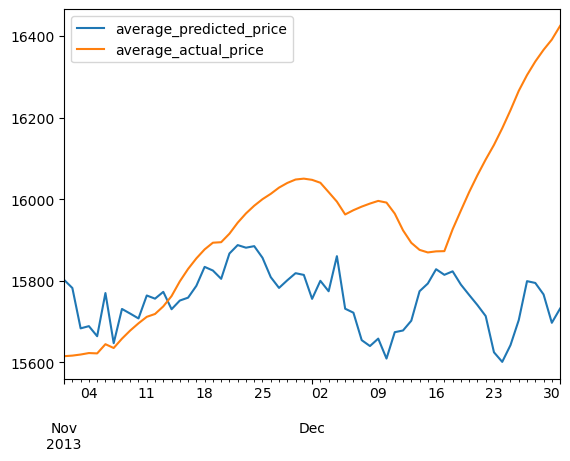

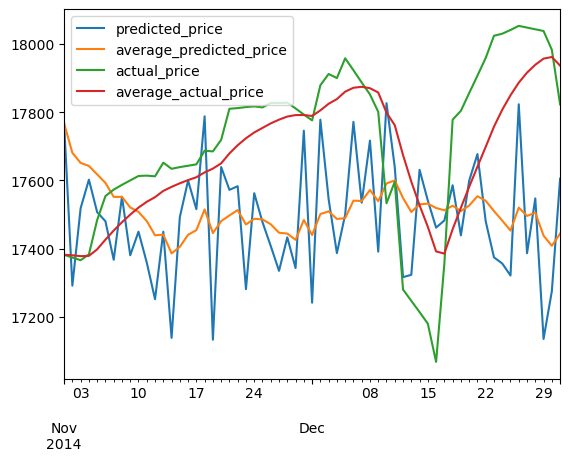

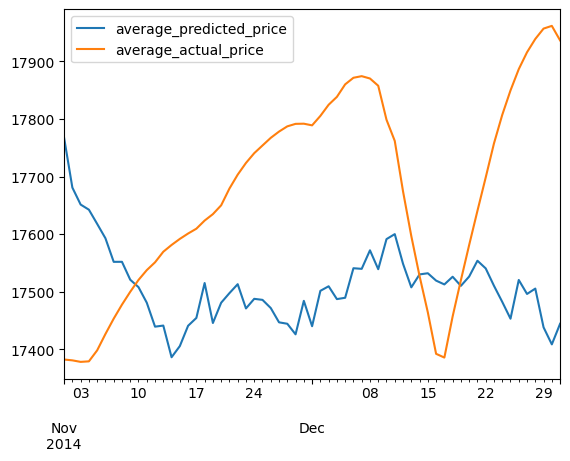

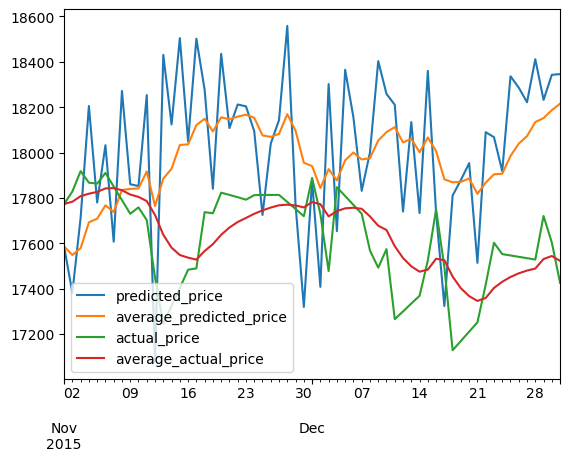

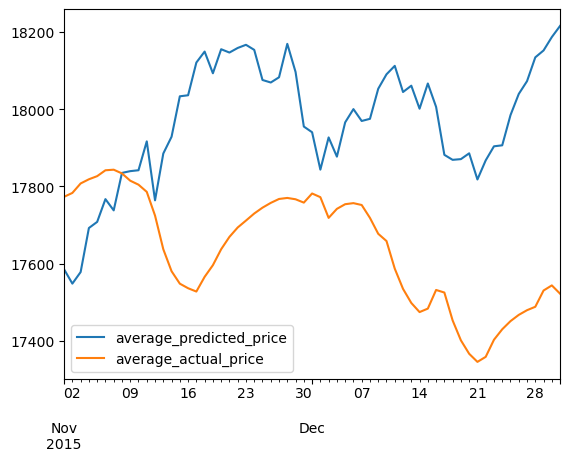

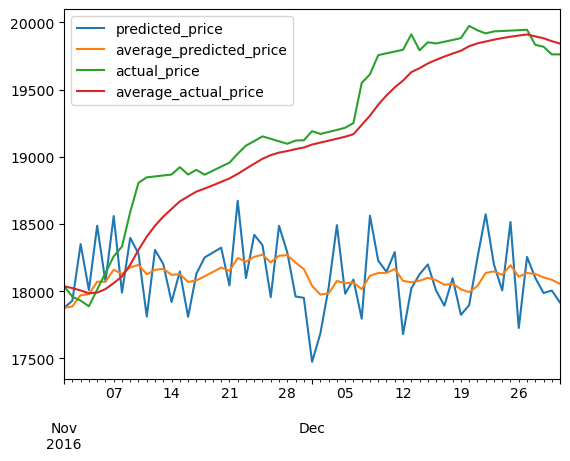

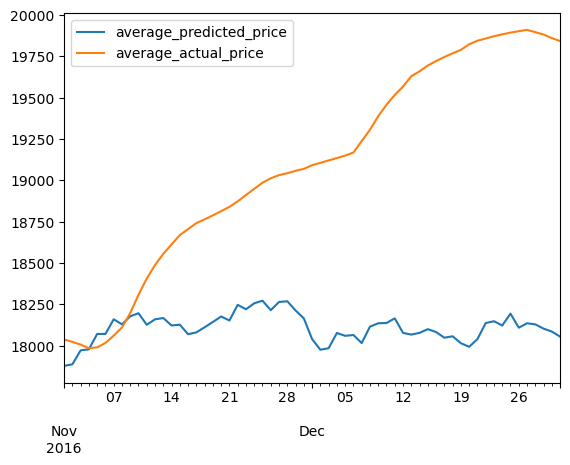

In [70]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from datetime import datetime, timedelta

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.items():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], df.loc[date, 'neu'], df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.items():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], df.loc[date, 'neu'], df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    rf = RandomForestRegressor(random_state=42)
    rf.fit(numpy_df_train, train['prices'])
    
    prediction, bias, contributions = ti.predict(rf, numpy_df_test)
    prediction_list.append(prediction)
    idx = pd.date_range(test_start_date, test_end_date)
    predictions_df_list = pd.DataFrame(data=prediction[0:], index=idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=10, adjust=False).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=10, adjust=False).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

In [71]:
# from IPython.display import Image  
# dot_data = tree.export_graphviz(rf, out_file=None, 
#                      feature_names=['comp', 'neg', 'neu', 'pos'],  
#                      class_names=iris.target_names,  
#                      filled=True, rounded=True,  
#                      special_characters=True)  
# graph = pydotplus.graph_from_dot_data(dot_data)  
# Image(graph.create_png())

MLP classifier

c:\Users\vedak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\vedak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\vedak\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

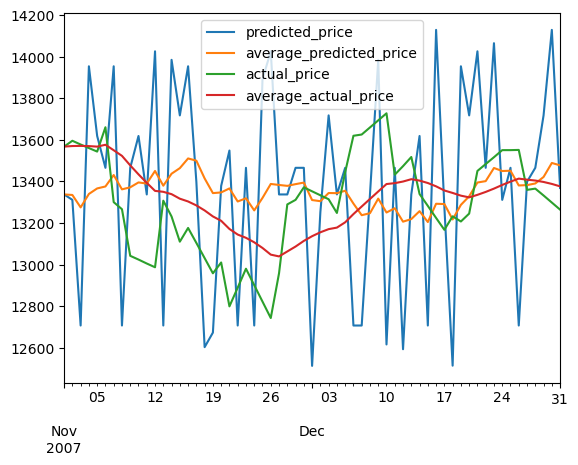

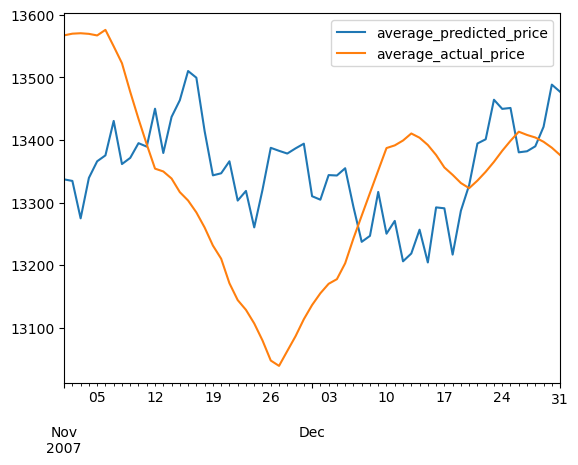

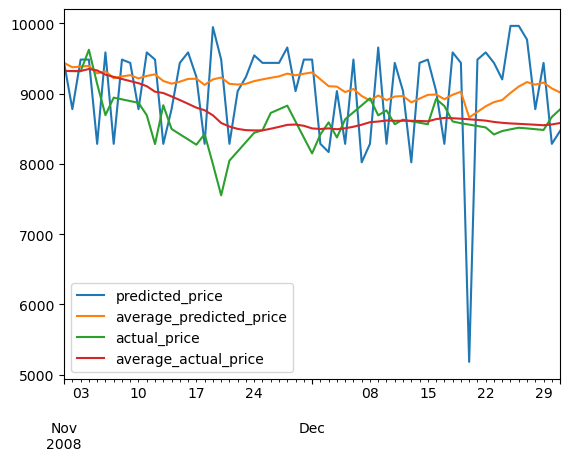

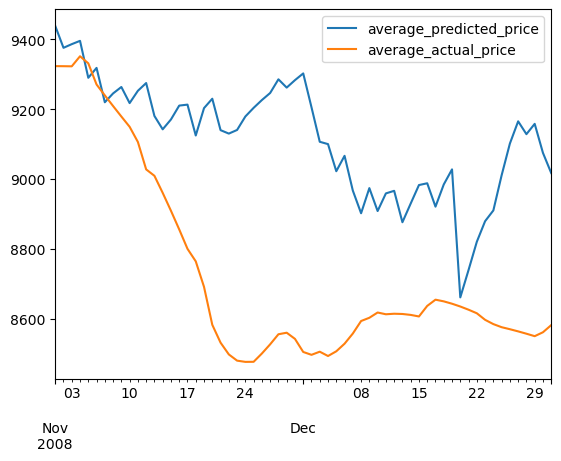

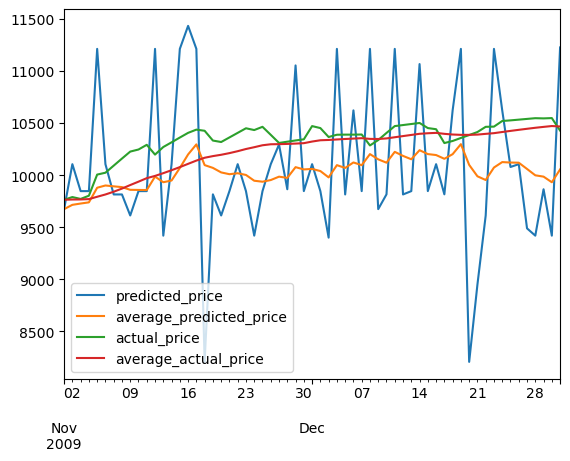

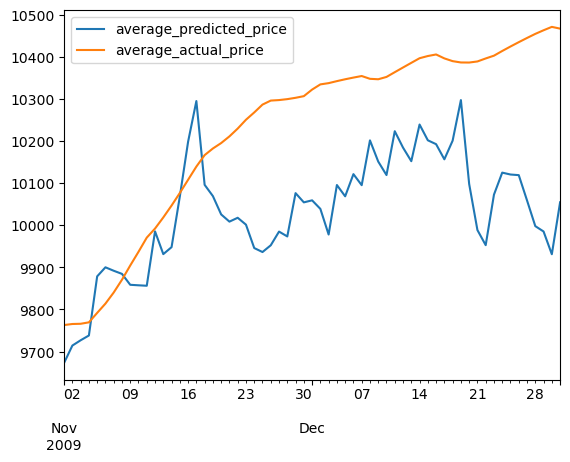

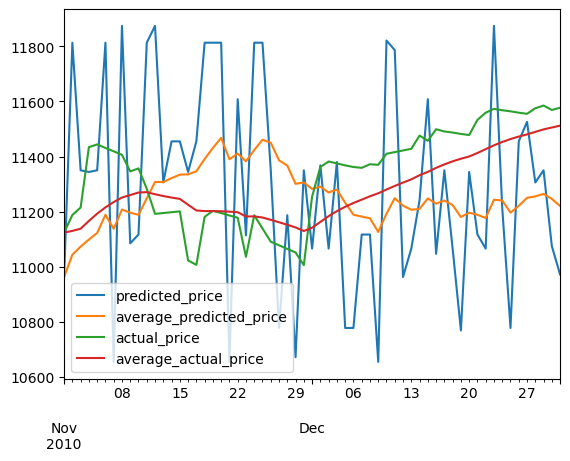

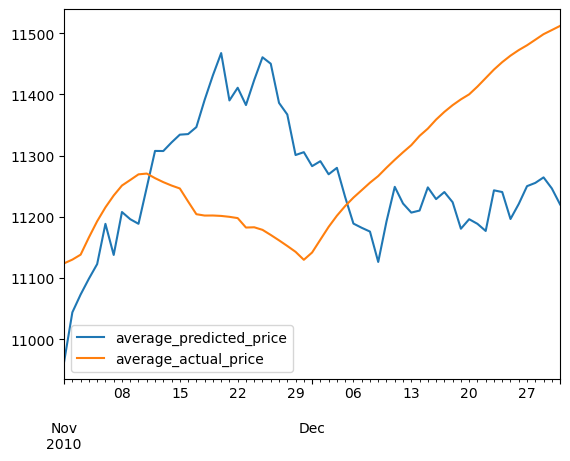

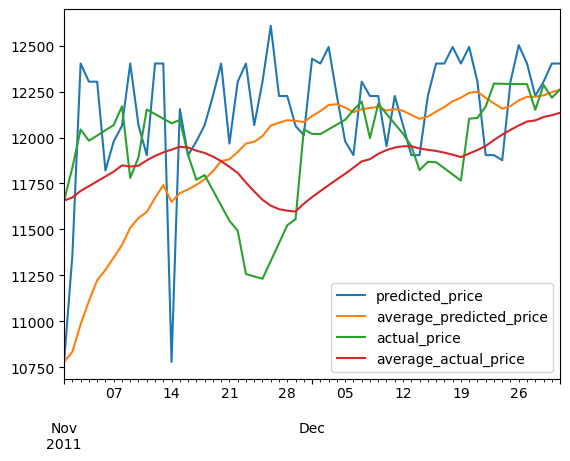

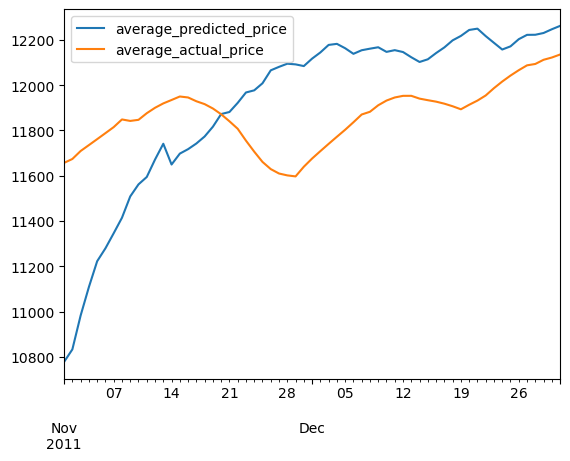

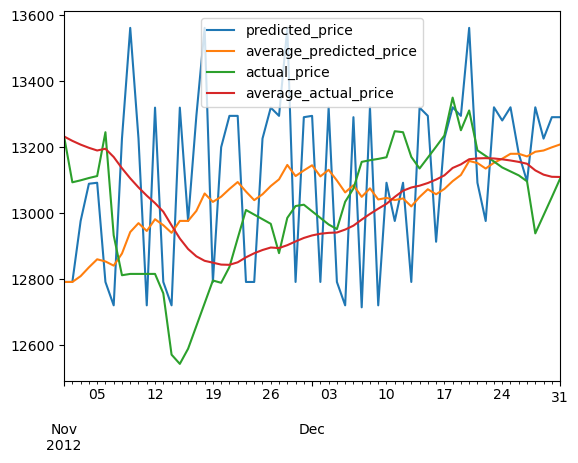

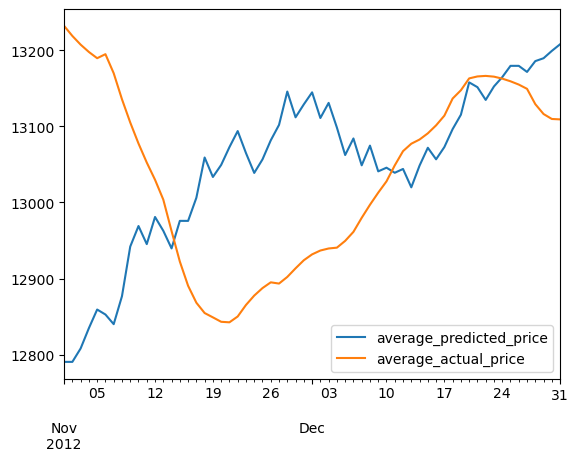

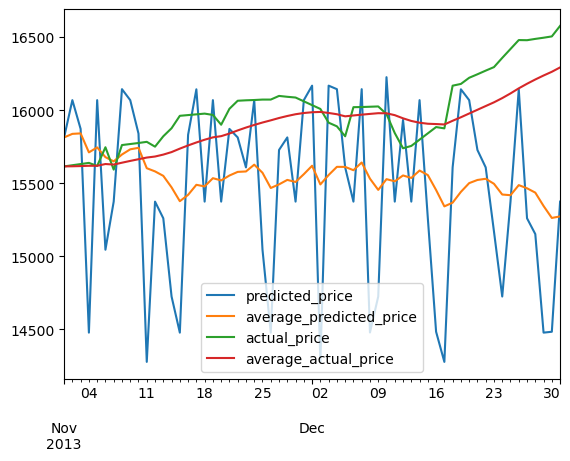

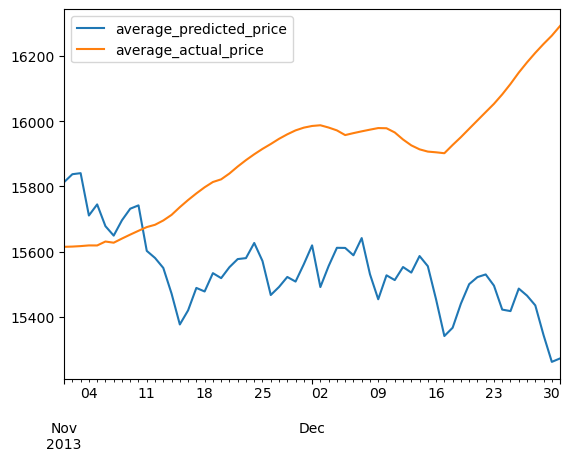

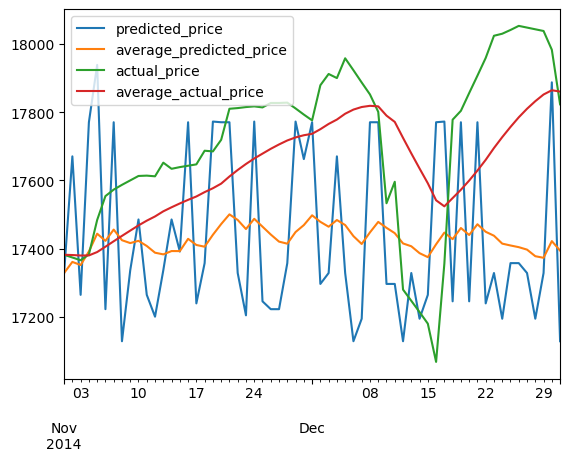

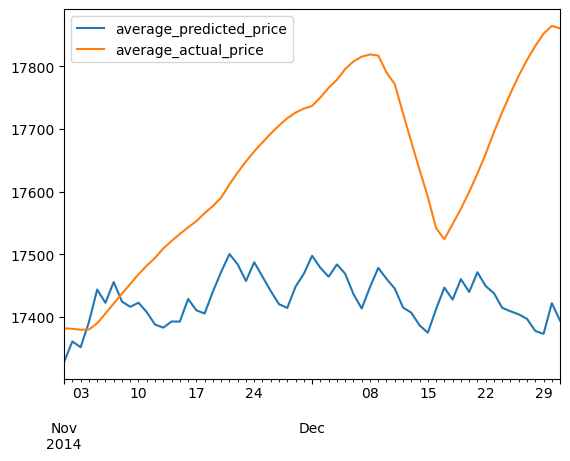

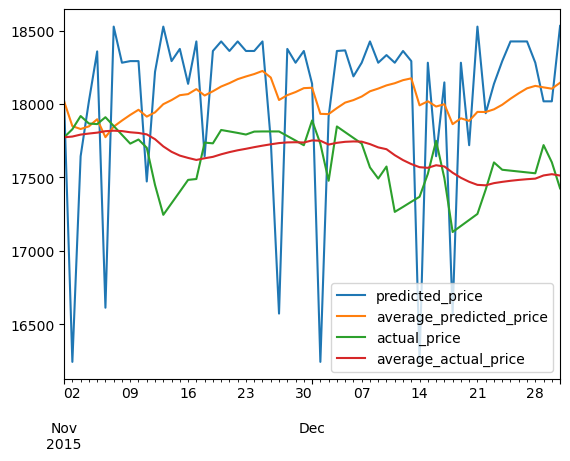

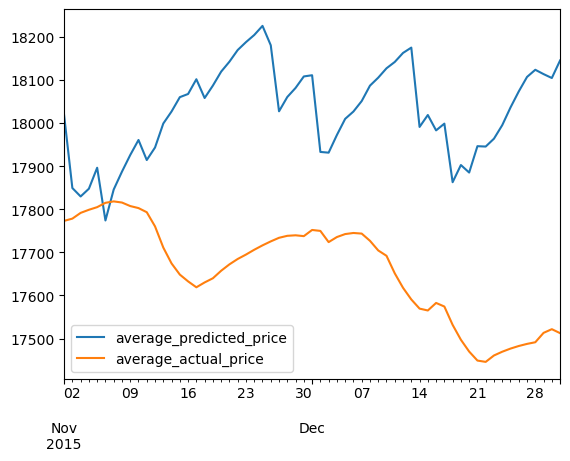

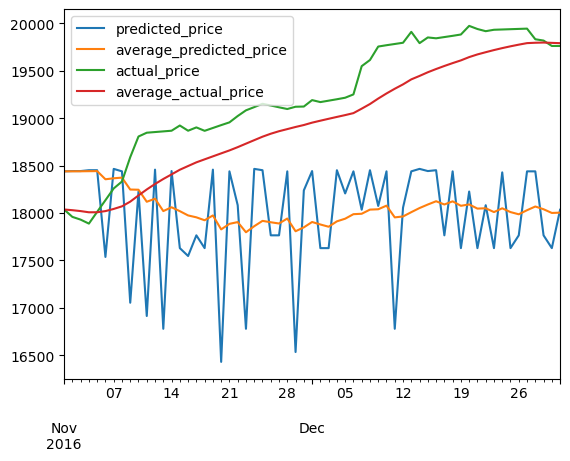

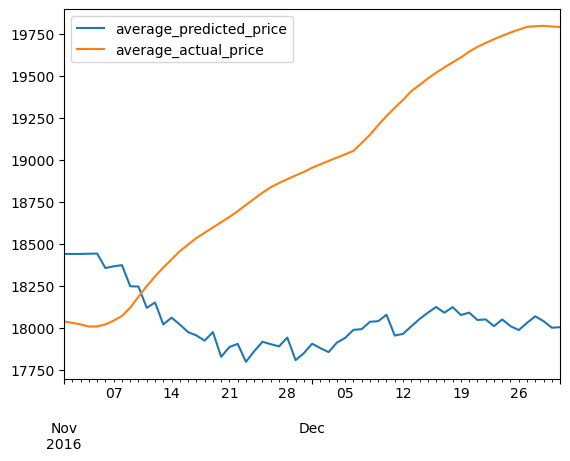

In [ ]:
from sklearn.neural_network import MLPClassifier
from datetime import datetime, timedelta

years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
prediction_list = []
for year in years:
    # Splitting the training and testing data
    train_start_date = str(year) + '-01-01'
    train_end_date = str(year) + '-10-31'
    test_start_date = str(year) + '-11-01'
    test_end_date = str(year) + '-12-31'
    train = df.loc[train_start_date : train_end_date]
    test = df.loc[test_start_date:test_end_date]
    
    # Calculating the sentiment score
    sentiment_score_list = []
    for date, row in train.T.items():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], df.loc[date, 'neu'], df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_train = np.asarray(sentiment_score_list)
    sentiment_score_list = []
    for date, row in test.T.items():
        sentiment_score = np.asarray([df.loc[date, 'compound'], df.loc[date, 'neg'], df.loc[date, 'neu'], df.loc[date, 'pos']])
        sentiment_score_list.append(sentiment_score)
    numpy_df_test = np.asarray(sentiment_score_list)
    
    # Generating models
    mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init=0.001, shuffle=False)
    mlpc.fit(numpy_df_train, train['prices'])   
    prediction = mlpc.predict(numpy_df_test)
    
    prediction_list.append(prediction)
    idx = pd.date_range(test_start_date, test_end_date)
    predictions_df_list = pd.DataFrame(data=prediction[0:], index=idx, columns=['prices'])
    
    difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list)
    predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

    # Smoothing the plot
    predictions_df_list['ewma'] = predictions_df_list["prices"].ewm(span=20, adjust=False).mean()
    predictions_df_list['actual_value'] = test['prices']
    predictions_df_list['actual_value_ewma'] = predictions_df_list["actual_value"].ewm(span=20, adjust=False).mean()
    # Changing column names
    predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
    predictions_df_list.plot()
    predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
    predictions_df_list_average.plot()

    # predictions_df_list.show()

In [77]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='tanh', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False)
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.010, learning_rate_init = 0.001, shuffle=False) # span = 20
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 100), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False) # span = 20 # best 1
mlpc = MLPClassifier(hidden_layer_sizes=(100, 200, 50), activation='relu', 
                         solver='lbfgs', alpha=0.005, learning_rate_init = 0.001, shuffle=False)
                     

<Axes: >

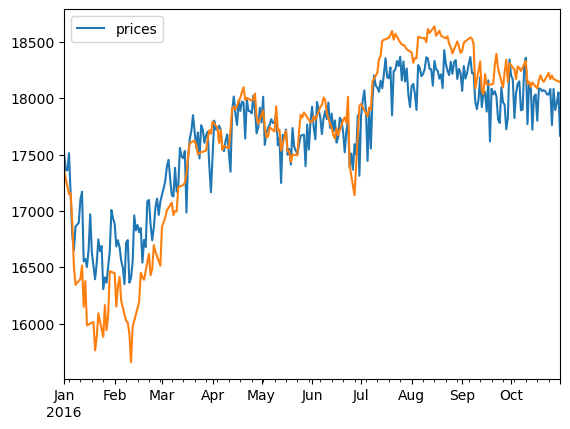

In [78]:
# checking the performance of training data itself
prediction, bias, contributions = ti.predict(rf, numpy_df_train)
idx = pd.date_range(train_start_date, train_end_date)
predictions_df1 = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
predictions_df1.plot() 
train['prices'].plot()